In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test_data = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')

In [4]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label = train_data[list_classes].values

In [6]:
list_sentences_train = train_data['comment_text'].fillna('CVxTz').values
list_sentences_test = test_data['comment_text'].fillna('CVxTz').values

In [7]:
from keras.preprocessing import text, sequence

In [8]:
# 상위 20000개 tokenizer
# fit on texts  -> list(list_sentences_train)
# list_tokenzied_train, list_tokenized_test  = texts_to_sequence ~~
# train_x, test_x -> sequence.pad_sequence // 최대길이 100 
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(list_sentences_train))

list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

train_x = sequence.pad_sequences(list_tokenized_train, maxlen=100)
test_x = sequence.pad_sequences(list_tokenized_test, maxlen=100)


In [9]:
# 모델 설계
# input 100 개
# 임베딩 레이어 (20000, 128)
# ~
# ~
# ~
# Dense(악플의 갯수, activation='sigmoid' )
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout


In [10]:
model = Sequential([
    Input(shape=(100, )),
    Embedding(20000, 128),
    Bidirectional(LSTM(50, return_sequences=True)),
    GlobalMaxPool1D(),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='sigmoid')
])

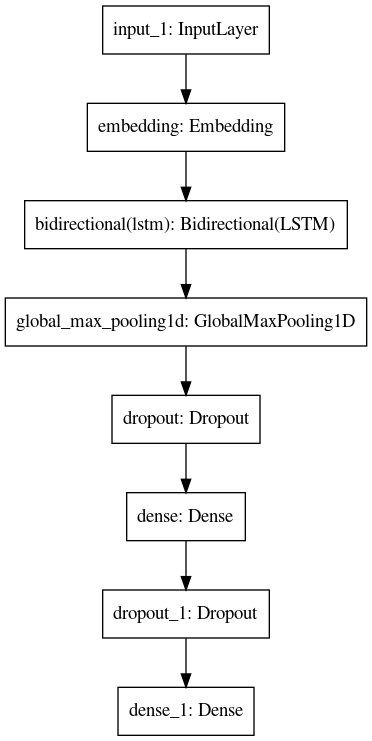

In [11]:
from keras.utils import plot_model
plot_model(model)

In [12]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_x, label, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
3990/3990 [==============================] - 119s 30ms/step - loss: 0.0551 - accuracy: 0.9942 - val_loss: 0.0536 - val_accuracy: 0.9941
Epoch 2/2
3990/3990 [==============================] - 120s 30ms/step - loss: 0.0549 - accuracy: 0.9941 - val_loss: 0.0536 - val_accuracy: 0.9931


In [19]:
# model predict <- test_x
prediction = model.predict(test_x)

In [21]:
# sample head
sample = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip')

sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [22]:
# prediction 을 할당
sample[list_classes] = prediction

In [18]:
# to_csv 
sample.to_csv('submission.csv', index=False)